##  Decision Tree
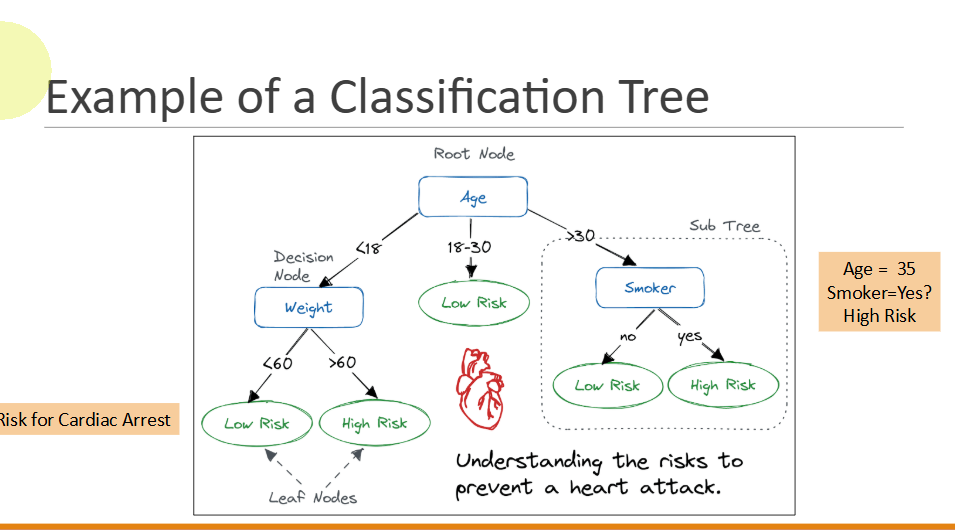

## Read dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\drug200.csv"
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

There are no missing values nor any duplicated data in this dataset

## Separate data into X and Y features

In [6]:
X = df.drop(columns='Drug')
Y = df[["Drug"]]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


## Data Preprocessing and Data Cleaning

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# separate X data into categorical and continuous
cat = list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

In [13]:
print(cat)

['Sex', 'BP', 'Cholesterol']


In [14]:
print(con)

['Age', 'Na_to_K']


In [10]:
cat_pipe = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [11]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [15]:
pre = ColumnTransformer([
    ("cat",cat_pipe,cat),
    ("con",num_pipe,con)
]).set_output(transform='pandas')

In [16]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [17]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


## Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [19]:
xtrain.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
114,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.473377,-0.944158
173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.200874,0.368382
5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.352186,-1.037693
126,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.314011,0.036431
117,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.261469,-0.830085


In [20]:
xtest.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
95,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.503851,-0.646762
15,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.715759,-0.078892
30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.594568,-1.017848
158,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.889843,-0.782762
128,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.162699,2.422679


In [21]:
ytrain.head()

,Drug
114,drugX
173,DrugY
5,drugX
126,DrugY
117,drugX


In [22]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


## Build the Decision Tree CLassifier model

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini'
)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [24]:
model.score(xtrain,ytrain)

1.0

In [25]:
model.score(xtest,ytest)

1.0

In [26]:
from sklearn.model_selection import GridSearchCV
base_model = DecisionTreeClassifier()

max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini'

In [27]:
params ={
    'max_depth' : [2,3,4,5,6,7,8],
    'min_samples_split':[1,2,3,4,6,8,10,12],
    'min_samples_leaf':[1,2,4,6,8,10,11],
    'criterion':['gini','entropy']
}

In [28]:
gscv = GridSearchCV(base_model,param_grid=params,cv=4,scoring="f1_macro")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 11],
                         'min_samples_split': [1, 2, 3, 4, 6, 8, 10, 12]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [30]:
gscv.best_score_

0.9873015873015873

In [31]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4)

In [32]:
best_dtc.score(xtrain,ytrain)

1.0

In [33]:
best_dtc.score(xtest,ytest)

1.0

## Confusion Matrix

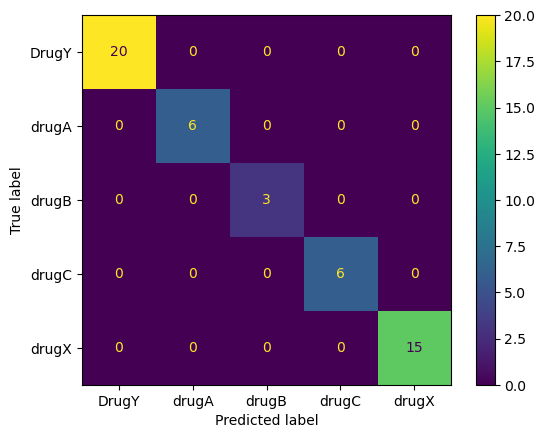

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [35]:
ypred = best_dtc.predict(xtest)
ypred[:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [36]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [37]:
yprobs = best_dtc.predict_proba(xtest)
yprobs[:5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        20
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## Above model is good model as it is resulting in f1_macro avg >0.8

Plot the decision tree

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [40]:
fea_names = xtrain.columns
fea_names

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

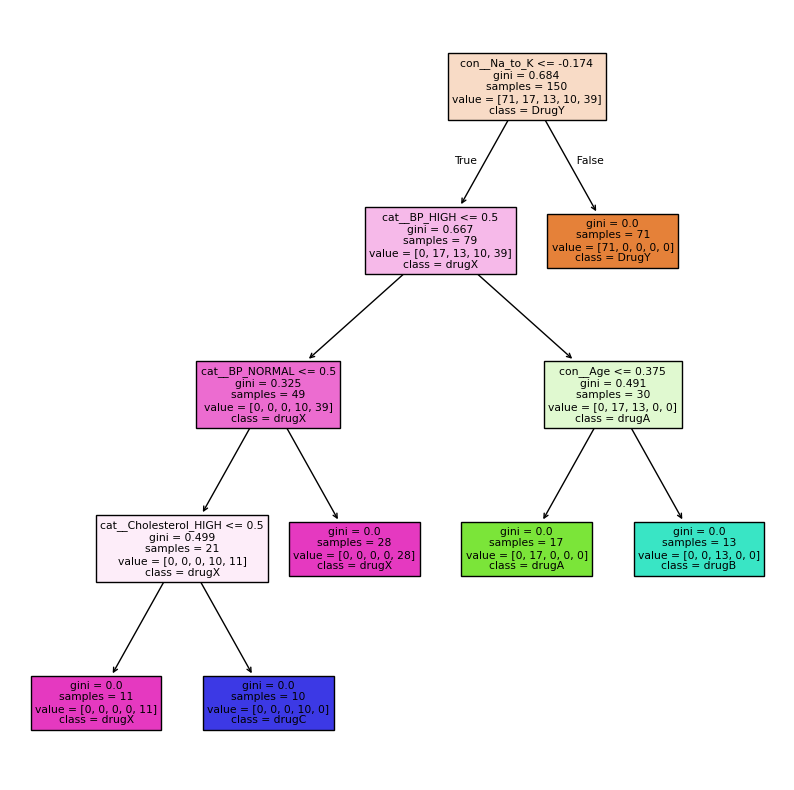

In [42]:
plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=fea_names,class_names=best_dtc.classes_,filled=True)
plt.show()

In [43]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.21487494, 0.        , 0.05307715,
       0.10217351, 0.        , 0.14369311, 0.4861813 ])

In [45]:
imp = pd.Series(best_dtc.feature_importances_,index=xtrain.columns)
imp.sort_values(ascending=False)

con__Na_to_K               0.486181
cat__BP_HIGH               0.214875
con__Age                   0.143693
cat__Cholesterol_HIGH      0.102174
cat__BP_NORMAL             0.053077
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_LOW                0.000000
cat__Cholesterol_NORMAL    0.000000
dtype: float64

<Axes: >

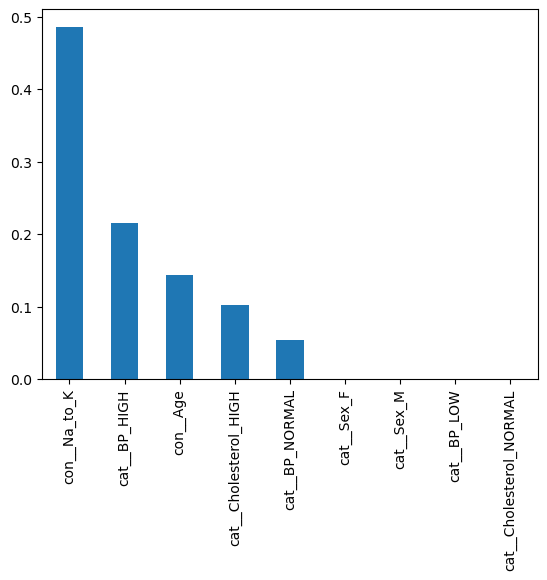

In [47]:
imp.sort_values(ascending=False).plot(kind='bar')

## Out of Sample Predictions

In [48]:
path2 = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\DrugTest.csv"

In [49]:
xnew = pd.read_csv(path2)
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN
5,67.0,F,NORMAL,HIGH,15.891
6,NaN,M,NORMAL,HIGH,25.786
7,51.0,M,HIGH,NORMAL,11.343
8,23.0,F,HIGH,HIGH,25.355
9,35.0,M,LOW,NORMAL,9.170


In [50]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [51]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,0.000000


In [52]:
final_preds = best_dtc.predict(xnew_pre)
final_preds

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugC', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugA', 'drugB', 'drugC', 'DrugY', 'drugA',
       'drugB', 'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'drugA', 'drugX', 'drugB', 'DrugY',
       'DrugY'], dtype=object)

In [53]:
probs = best_dtc.predict_proba(xnew_pre)
probs

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0.

In [54]:
xnew["Drug_Predicted"] = final_preds
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predicted
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY
5,67.0,F,NORMAL,HIGH,15.891,DrugY
6,NaN,M,NORMAL,HIGH,25.786,DrugY
7,51.0,M,HIGH,NORMAL,11.343,drugB
8,23.0,F,HIGH,HIGH,25.355,DrugY
9,35.0,M,LOW,NORMAL,9.170,drugX


# Save the data to csv files

In [55]:
xnew.to_csv("DrugPredictedResults.csv",index=False)